# Visualizar variables de output de modelos traducidos SD => DESV

In [3]:
import re
import matplotlib.pyplot as plt
import random

#filename = '../modelos-nested/modelos/lotka-volterra/output.out'
#variables = ['out_port_predator', 'out_port_prey']

#filename = '../modelos-nested/modelos/loanable-funds-matlab/output.out'
#variables = ['out_port_workers', 'out_port_loans', 'out_port_bankersnw']

#filename = '../modelos-nested/modelos/goodwin-minsky-matlab/output.out'
#variables = ['out_port_laborproductivity', 'out_port_wagerate', 'out_port_population', 'out_port_capital', 
#             'out_port_debt']

filename = '../modelos-nested/modelos/lotka-volterra-nested-1/output.out'
variables = ['out_port_predator', 'out_port_prey']

###################################################################
#filename = '../modelos/loanable-funds-matlab/loanable-funds.out'
#variables = ['workers', 'loans', 'bankersnw']

#filename = '../modelos/godley-tables-matlab/godley-tables-shocks.out'
#variables = ['workers', 'bank', 'firms']

#filename = '../modelos/goodwin-minsky/goodwin.out'
#variables = ['laborproductivity', 'wagerate', 'population', 'capital', 'debt']

#filename = '../modelos/goodwin-minsky-matlab/goodwin.out'
#variables = ['laborproductivity', 'wagerate', 'population', 'capital', 'debt']

#filename = '../modelos/dueling-loops/dueling-loops.out'
#variables = ['degenerates', 'neutralists', 'rationalsupporters']

###################################################################
def get_var(out_var):
    out = []
    def str2time(s):
        ls = list(map(lambda x : float(x), s.split(':'))) # hh : mm : ss : ms : ???
        return round(ls[0] * 3600 + ls[1] * 60 + ls[2] + ls[3] / 1000., 2)

    with open(filename, 'r') as f:
        for line in f:
            line_split = line.split(' ')
            if(line_split[1] == out_var):
                t = str2time(line_split[0])
                val = float(re.split("(\[.+?\])", line_split[2])[1].replace('[', '').replace(']', ''))
                out.append((t, val))
    return out
# rand_smpl = [ mylist[i] for i in sorted(random.sample(xrange(len(mylist)), 4)) ]

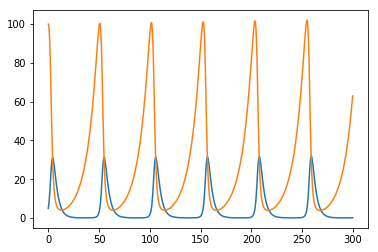

In [4]:
# Todos juntos
for varname in variables:
    plt.figure(1)
    mylist = get_var(varname)
    ts,vals = zip(*mylist)
    plt.plot(ts,vals)

plt.show()

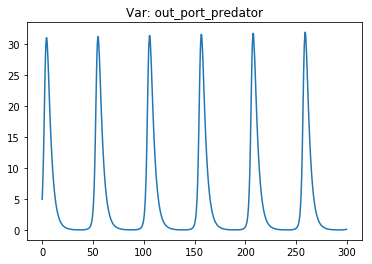

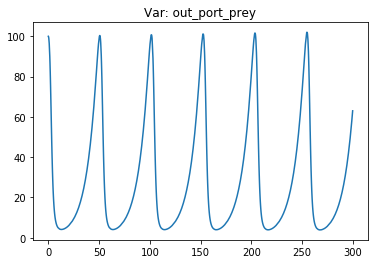

In [5]:
# Todos separados
i = 1
for varname in variables:
    mylist = get_var(varname)
    ts, vals = zip(*mylist)
    
    plt.figure(i)
    plt.plot(ts,vals)
    plt.title('Var: ' + varname)
    i += 1
plt.show()